In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для времени

Создадим датасет, по фильмам с сайта : 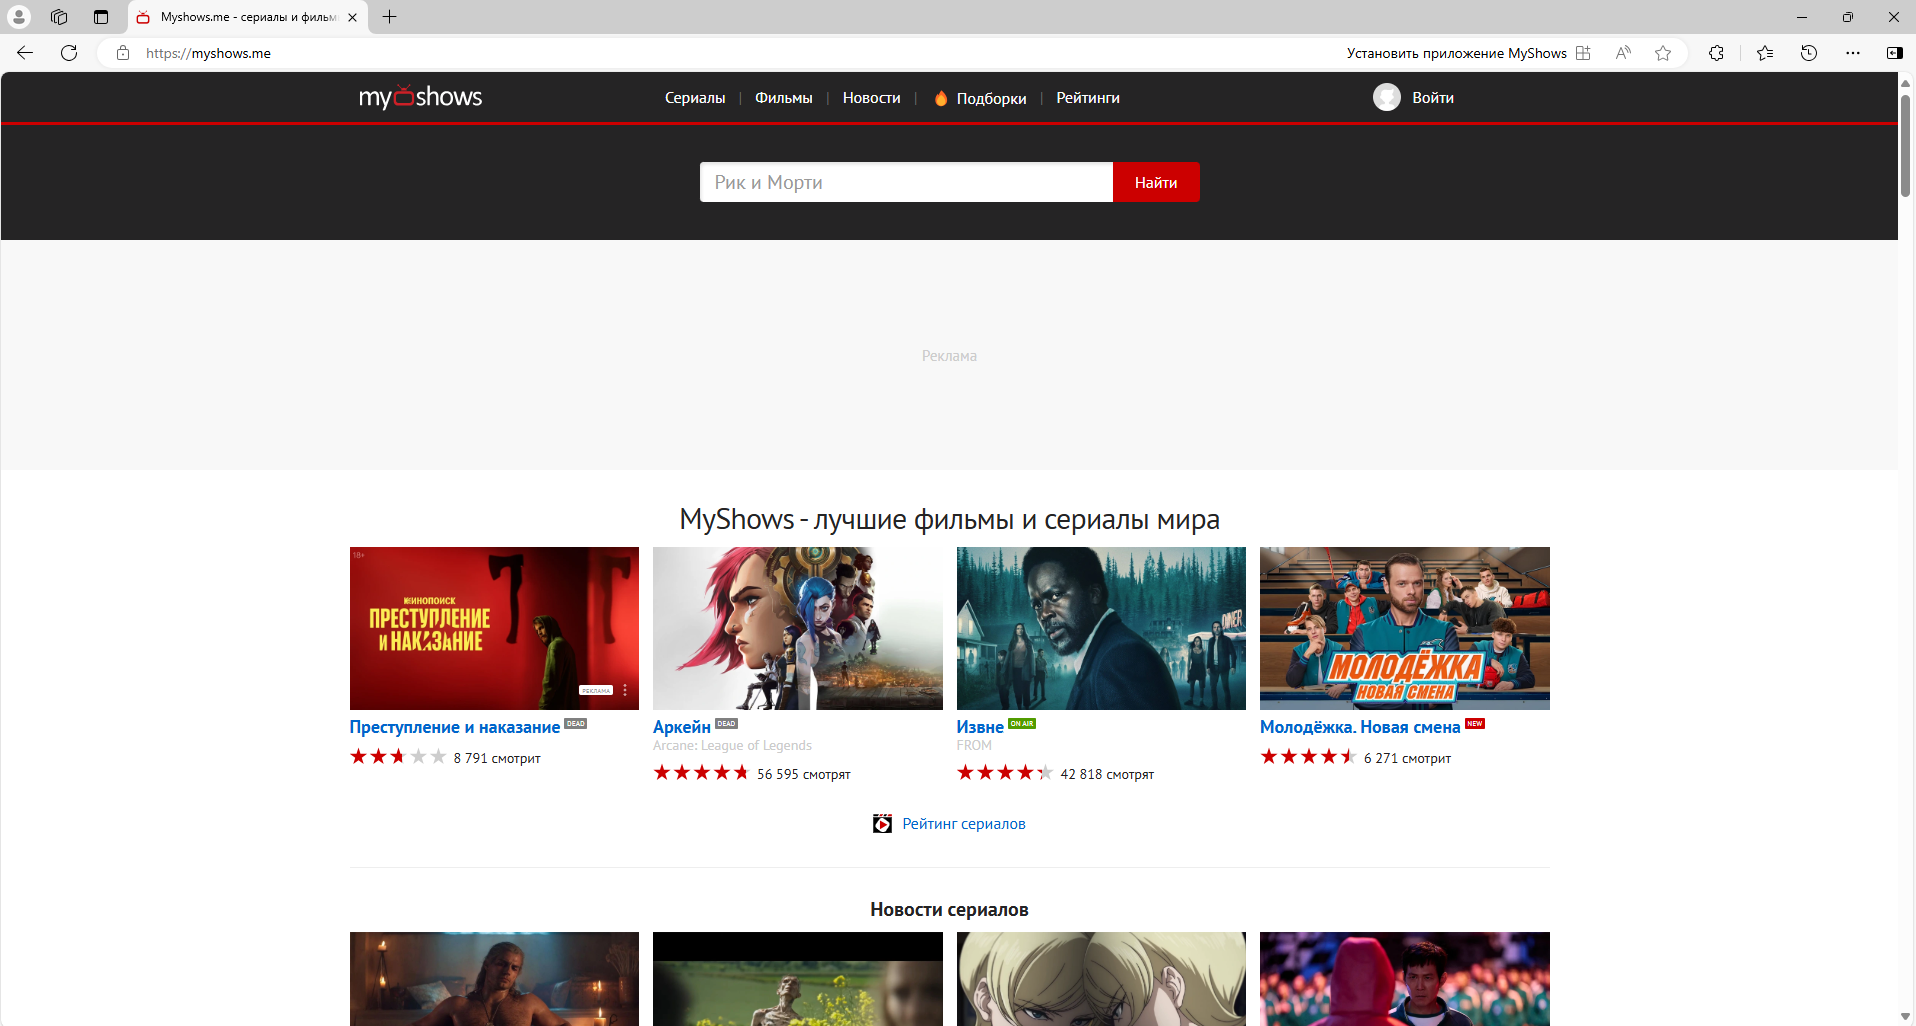

Перейдем на какой нибудь фильм и посомтрим его url

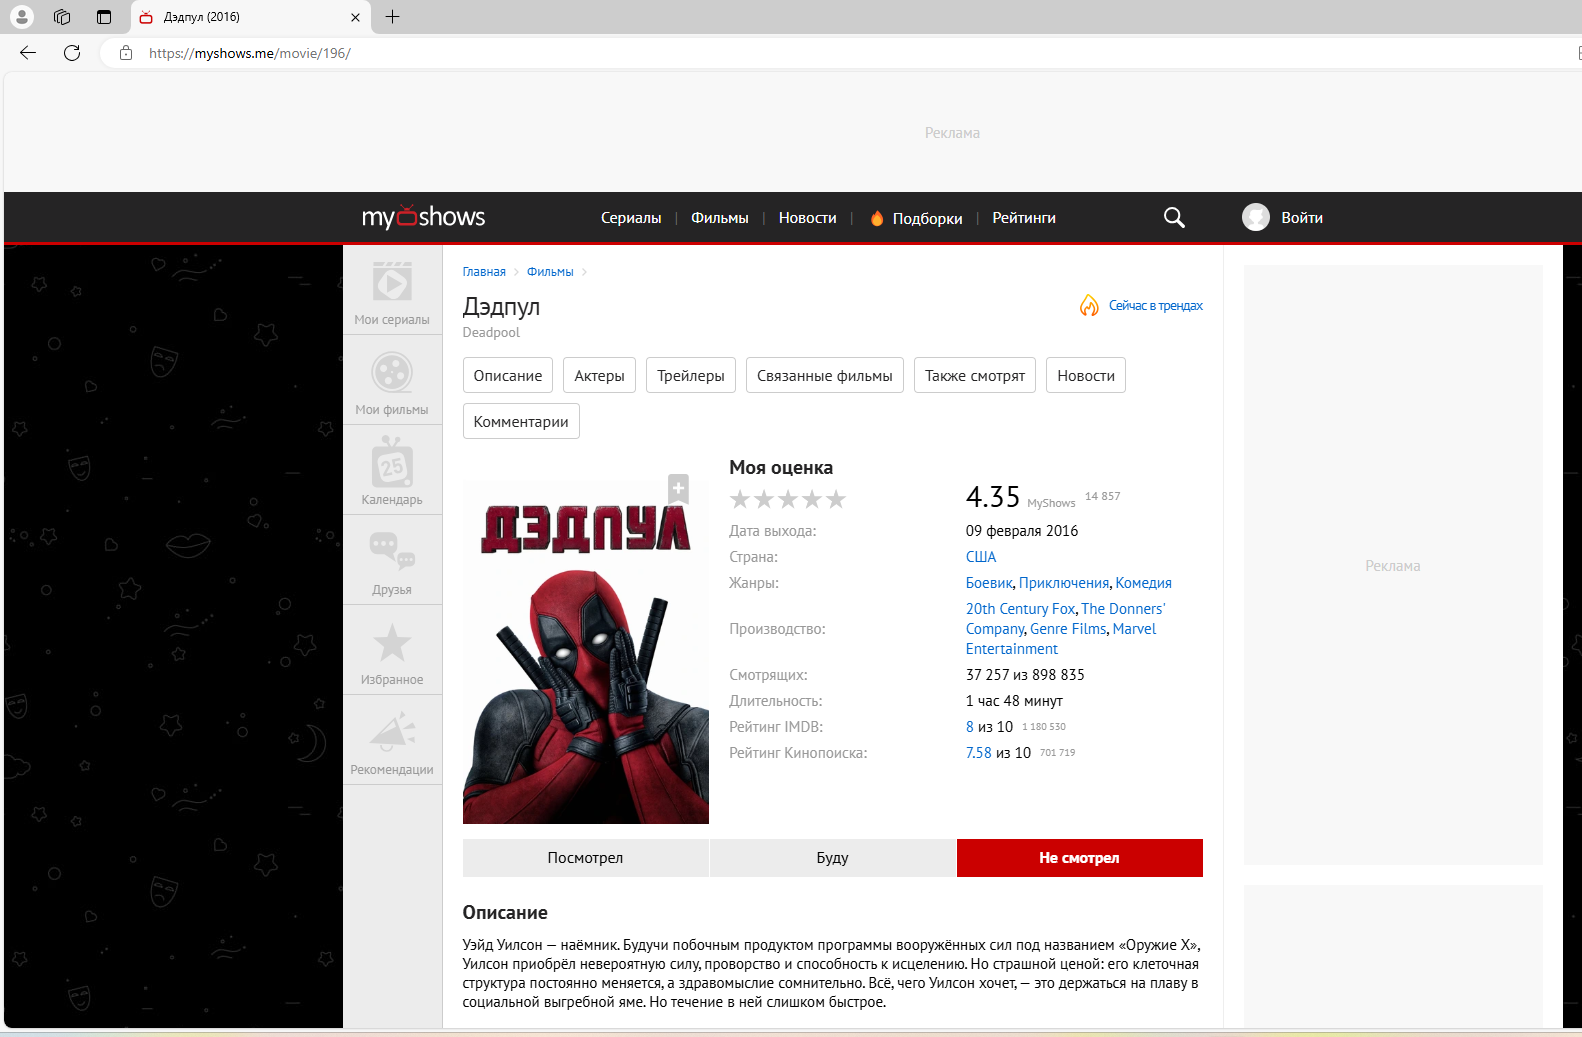

Видно что сверху есть итератор, посомтрим привязан ли он к жанру

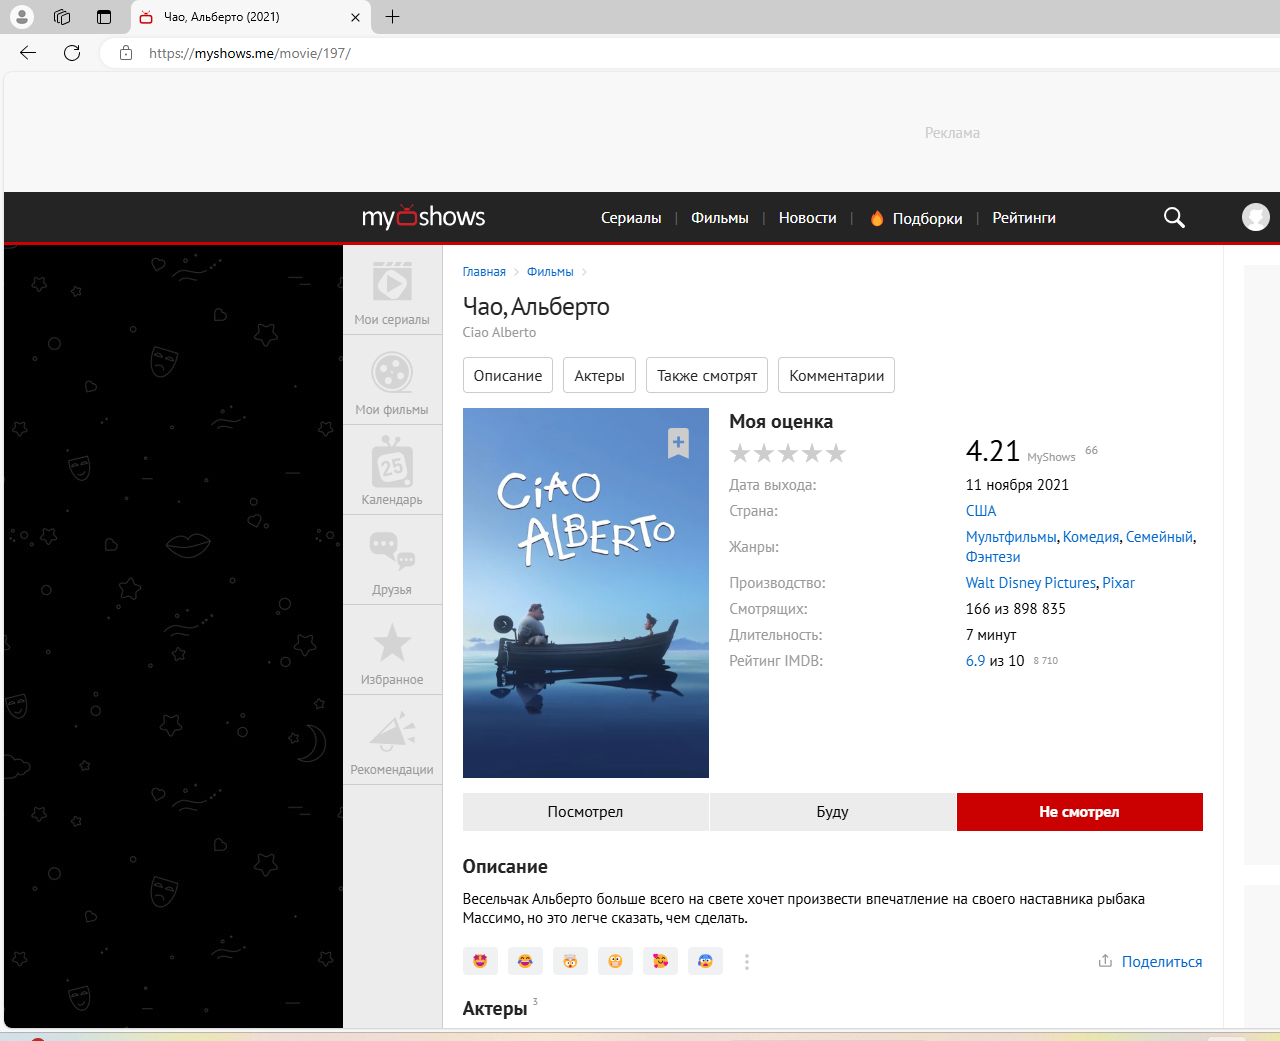

Видно, что данные не стурктированы по индексу, значит мы можем просто пробежатся по таким страницам и собрать данные. Так и сделаем!

In [6]:
link_pattern = f"https://myshows.me/movie/{1}/"
link_pattern

'https://myshows.me/movie/1/'

А теперь попробуем считатать данные с сайта

In [7]:
!pip install fake_useragent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 6.5 MB/s eta 0:00:00


In [8]:
# подгрузим один из методов этой библиотеки
from fake_useragent import UserAgent
response = requests.get(link_pattern, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [9]:
from bs4 import BeautifulSoup

In [10]:
html = response.content
soup = BeautifulSoup(html, 'html.parser')

In [11]:
print(soup.prettify()[:2000])

<!DOCTYPE html>
<html data-capo="" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Соник 2 в Кино (2022)
  </title>
  <link href="https://myshows.akamaized.net/_nuxt/entry.C1R6HXLN.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/vue-final-modal.SAIDGbjG.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/AuthModal.B8W9rWLt.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/Input.iirPZSgn.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/default.bnSpZP5b.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/ContentBanner.BIIjIR2l.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/Movie.BOUEgoxF.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/Breadcrumbs.xngroLJo.css" rel="stylesheet"/>
  <link href="https://myshows.akamaized.net/_nuxt/MovieStatu

In [12]:
import requests  # Библиотека для выполнения HTTP-запросов
from bs4 import BeautifulSoup  # Библиотека для парсинга HTML
import json  # Для работы с JSON-данными
from fake_useragent import UserAgent  # Для генерации случайных User-Agent
import re  # Для работы с регулярными выражениями

# Ссылка на страницу фильма
link_pattern = "https://myshows.me/movie/2/"

# Генерация случайного User-Agent для имитации запроса с браузера
ua = UserAgent()

# Отправка GET-запроса на указанную страницу с заголовком User-Agent
response = requests.get(link_pattern, headers={'User-Agent': ua.chrome})

# Проверка, успешно ли загружена страница (код ответа 200)
if response.status_code == 200:
    # Создание объекта BeautifulSoup для парсинга HTML-страницы
    soup = BeautifulSoup(response.content, 'html.parser')

    # Извлечение тега <script type="application/ld+json"> для структурированных данных
    script_tag = soup.find("script", type="application/ld+json")

    if script_tag:
        # Парсим содержимое тега <script> как JSON
        data = json.loads(script_tag.string)

        # Извлекаем информацию из JSON данных
        movie_name = data.get("name", "Не указано")
        country = data.get("countryOfOrigin", {}).get("name", "Не указано")
        genres = data.get("genre", [])
        duration = data.get("timeRequired", "Не указано")
        date_published = data.get("datePublished", "Не указана")
        rating_value = data.get("aggregateRating", {}).get("ratingValue", "Нет рейтинга")
        rating_count = data.get("aggregateRating", {}).get("ratingCount", "Нет оценок")

        # Ищем компании-производители
        production = []
        # Найти строку с "Производство:"
        production_title = soup.find("td", class_="info-row__title", string=re.compile(r"^\s*Производство:\s*$"))

        if production_title:
            # Находим соседний <td class="info-row__value">
            production_value = production_title.find_next("td", class_="info-row__value")

            if production_value:
                # Находим все теги <a> внутри <td class="info-row__value">
                companies = production_value.find_all("a")
                production = [company.text.strip() for company in companies]  # Добавляем найденные компании в список production
        else:
            print("Секция 'Производство' не найдена!")

        # Ищем рейтинг IMDB
        imdb_rating = None
        imdb_rating_title = soup.find("td", class_="info-row__title", string=re.compile(r"^\s*Рейтинг IMDB:\s*$"))

        if imdb_rating_title:
            # Извлекаем рейтинг из тега <a> в соседней ячейке
            imdb_value = imdb_rating_title.find_next("td", class_="info-row__value")
            if imdb_value:
                imdb_rating = imdb_value.find("a").text.strip()

        # Извлекаем описание фильма из класса HtmlContent
        description = None
        description_div = soup.find("div", class_="HtmlContent")

        if description_div:
            description = description_div.get_text(strip=True)  # Получаем текст внутри блока

        # Извлекаем отзывы на фильм
        reviews = []
        review_elements = soup.find_all("div", class_="Comment__text")  # Ищем все отзывы

        for i, review in enumerate(review_elements[:3]):  # Ограничиваем количество отзывов до 3
            reviews.append(review.get_text(strip=True))  # Добавляем текст отзыва в список

        actors = data.get("actor", [])
        actor_list = [{"name": actor["name"], "url": actor["url"]} for actor in actors]

        # Выводим данные
        print("Название фильма:", movie_name)
        print("Страна производства:", country)
        print("Жанры:", ", ".join(genres))
        print("Длительность (минут):", duration)
        print("Дата публикации:", date_published)
        print("Рейтинг:", rating_value)
        print("Количество оценок:", rating_count)
        print("Компании-производители:", ", ".join(production) if production else "Не указаны")
        print("Рейтинг IMDB:", imdb_rating if imdb_rating else "Не указан")
        print("Описание фильма:", description if description else "Не указано")
        print("\nАктеры:")
        string_actor = ""
        for actor in actor_list:
            string_actor += str(actor['name']) + str(", ")
        print(string_actor)
        # Выводим 3 отзыва
        print("\nОтзывы:")
        for i, review in enumerate(reviews, 1):
            print(f"{i}. {review}")
    else:
        print("Не найден тег <script type='application/ld+json'>")
else:
    print(f"Ошибка при загрузке страницы: {response.status_code}")

Название фильма: Бэтмен
Страна производства: США
Жанры: Криминал, Детектив, Триллер
Длительность (минут): 177
Дата публикации: 2022-03-01
Рейтинг: 3.86
Количество оценок: 3223
Компании-производители: 6th & Idaho Motion Picture Company, Dylan Clark Productions, DC Films, Warner Bros. Pictures
Рейтинг IMDB: 7.8
Описание фильма: После двух лет поисков правосудия на улицах Готэма для своих сограждан Бэтмен становится олицетворением беспощадного возмездия. Когда в городе происходит серия жестоких нападений на представителей элиты, загадочные улики приводят Брюса Уэйна в самые темные закоулки преступного мира, где он встречает Женщину-Кошку, Пингвина, Кармайна Фальконе и Загадочника. Теперь под прицелом оказывается сам Бэтмен, которому предстоит отличить друга от врага и восстановить справедливость во имя Готэма.

Актеры:
Jeffrey Wright, Andy Serkis, Con O'Neill, Elliot Warren, Phil Aizlewood, Angela Yeoh, Heider Ali, Jay Lycurgo, Rupert Penry-Jones, Mike Capozzola, Robert Pattinson, Adam Ro

In [13]:
import requests
from bs4 import BeautifulSoup
import json
import re
from fake_useragent import UserAgent
import pandas as pd
import time

def creat_string_in_dataset(link):
    agent = UserAgent()  # Создаем User-Agent
    response = requests.get(link, headers={'User-Agent': agent.chrome})  # Выполняем запрос
    if response.status_code != 200:
        print(f"Ошибка при загрузке страницы: {response.status_code}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')  # Парсим HTML
    script_tag = soup.find("script", type="application/ld+json")
    if not script_tag:
        print("Не найден тег <script type='application/ld+json'>")
        return None

    data = json.loads(script_tag.string)  # Извлекаем JSON-данные
    movie_name = data.get("name", "Не указано")
    country = data.get("countryOfOrigin", {}).get("name", "Не указано")
    genres = data.get("genre", [])
    duration = data.get("timeRequired", "Не указано")
    date_published = data.get("datePublished", "Не указана")
    rating_value = data.get("aggregateRating", {}).get("ratingValue", "Нет рейтинга")
    rating_count = data.get("aggregateRating", {}).get("ratingCount", "Нет оценок")

    # Производители
    production = []
    production_title = soup.find("td", class_="info-row__title", string=re.compile(r"^\s*Производство:\s*$"))
    if production_title:
        production_value = production_title.find_next("td", class_="info-row__value")
        if production_value:
            production = [company.text.strip() for company in production_value.find_all("a")]

    # Рейтинг IMDB
    imdb_rating = None
    imdb_rating_title = soup.find("td", class_="info-row__title", string=re.compile(r"^\s*Рейтинг IMDB:\s*$"))
    if imdb_rating_title:
        imdb_value = imdb_rating_title.find_next("td", class_="info-row__value")
        if imdb_value and imdb_value.find("a"):
            imdb_rating = imdb_value.find("a").text.strip()

    # Описание
    description = None
    description_div = soup.find("div", class_="HtmlContent")
    if description_div:
        description = description_div.get_text(strip=True)

    # Отзывы
    reviews = []
    review_elements = soup.find_all("div", class_="Comment__text")
    for i, review in enumerate(review_elements[:3]):  # Ограничиваем 3 отзывами
        reviews.append(review.get_text(strip=True))

    # Актеры
    actors = data.get("actor", [])
    string_actor = ", ".join([actor["name"] for actor in actors])

    # Формируем результат
    result = {
        "Name_movie": movie_name,
        "Country": country,
        "Category": ", ".join(genres),
        "Duration": duration,
        "Date": date_published,
        "Rating": rating_value,
        "Ratings count": rating_count,
        "Producer": ", ".join(production) if production else "Не указаны",
        "Rating IMDB": imdb_rating if imdb_rating else "Не указан",
        "Description": description if description else "Не указано",
        "Actors": string_actor,
        "Reviews": " | ".join(reviews) if reviews else "Нет отзывов"
    }
    return result



In [15]:
from tqdm import tqdm
import pandas as pd

# Цикл с прогресс-баром tqdm
final_df = pd.DataFrame(columns=[
    'Name_movie', 'Country', 'Category', 'Duration',
    'Date', 'Rating', 'Ratings count', 'Producer',
    'Rating IMDB', "Description", "Actors", 'Reviews'
])

for i in tqdm(range(1, 10001), desc="Парсинг фильмов"):  # Указываем диапазон фильмов с прогресс-баром
    link = f"https://myshows.me/movie/{i}/"
    result = creat_string_in_dataset(link)
    if result:
        final_df = pd.concat([final_df, pd.DataFrame([result])], ignore_index=True).dropna(axis=1)
    time.sleep(0.3)  # Пауза, чтобы не перегружать сервер

print(final_df)


Парсинг фильмов:  16%|█▌        | 1563/10000 [38:52<3:36:52,  1.54s/it]

Ошибка при загрузке страницы: 404


Парсинг фильмов:  25%|██▍       | 2455/10000 [1:00:44<3:04:51,  1.47s/it]

Ошибка при загрузке страницы: 404


Парсинг фильмов:  46%|████▌     | 4584/10000 [1:51:10<2:09:18,  1.43s/it]

Ошибка при загрузке страницы: 404


Парсинг фильмов: 100%|██████████| 10000/10000 [4:03:27<00:00,  1.46s/it]

                           Name_movie         Country  \
0                      Соник 2 в Кино          Япония   
1                              Бэтмен             США   
2                        Плохие Парни          Япония   
3     Анчартед: На картах не значится             США   
4                             Наёмник  Великобритания   
...                               ...             ...   
9992                 Игрища престолов             США   
9993                 Последний викинг  Великобритания   
9994                 Братья по оружию             США   
9995                              Ева         Франция   
9996                             Лицо          Польша   

                                               Category Duration        Date  \
0                Боевик, Приключения, Семейный, Комедия      122  2022-03-30   
1                           Криминал, Детектив, Триллер      177  2022-03-01   
2     Семейный, Мультфильмы, Приключения, Комедия, К...      100  2022-03-1

In [18]:
for i in tqdm(range(10002, 10005), desc="Парсинг фильмов"):  # Указываем диапазон фильмов с прогресс-баром
    link = f"https://myshows.me/movie/{i}/"
    result = creat_string_in_dataset(link)
    if result:
        final_df = pd.concat([final_df, pd.DataFrame([result])], ignore_index=True).dropna(axis=1)
    time.sleep(0.3)  # Пауза, чтобы не перегружать сервер

print(final_df)

Парсинг фильмов: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]

                           Name_movie         Country  \
0                      Соник 2 в Кино          Япония   
1                              Бэтмен             США   
2                        Плохие Парни          Япония   
3     Анчартед: На картах не значится             США   
4                             Наёмник  Великобритания   
...                               ...             ...   
9995                              Ева         Франция   
9996                             Лицо          Польша   
9997               Солнце тоже звезда             США   
9998                  Плюшевый монстр        Бразилия   
9999           Слонёнок пошёл учиться            СССР   

                                               Category Duration        Date  \
0                Боевик, Приключения, Семейный, Комедия      122  2022-03-30   
1                           Криминал, Детектив, Триллер      177  2022-03-01   
2     Семейный, Мультфильмы, Приключения, Комедия, К...      100  2022-03-1

In [19]:
final_df

,Name_movie,Country,Category,Duration,Date,Rating,Ratings count,Producer,Rating IMDB,Description,Actors,Reviews
0,Соник 2 в Кино,Япония,"Боевик, Приключения, Семейный, Комедия",122,2022-03-30,3.72,1078,"Original Film, Blur Studio, Marza Animation Pl...",6.5,"Поселившись в Грин Хилз, Соник стремится доказ...","Adam Pally, Natasha Rothwell, Shemar Moore, Le...","Первая часть больше понравилась, но и эта част..."
1,Бэтмен,США,"Криминал, Детектив, Триллер",177,2022-03-01,3.86,3223,"6th & Idaho Motion Picture Company, Dylan Clar...",7.8,После двух лет поисков правосудия на улицах Го...,"Jeffrey Wright, Andy Serkis, Con O'Neill, Elli...",Удивительно что Роберт Паттинсон оказался в эт...
2,Плохие Парни,Япония,"Семейный, Мультфильмы, Приключения, Комедия, К...",100,2022-03-17,4.23,710,"DreamWorks Animation, Scholastic Entertainment...",6.8,Мир еще не видел столь искусных авантюристов: ...,"Awkwafina, Marc Maron, Alex Borstein, Kelly Co...",Это было забавно | @Novitskaya: прикольный мул...
3,Анчартед: На картах не значится,США,"Боевик, Приключения",116,2022-02-10,3.95,2853,"Columbia Pictures, Atlas Entertainment, PlaySt...",6.3,"Нейтан Дрейк и Виктор «Салли» Салливан, два ис...","Tom Holland, Tiernan Jones, Rudy Pankow, Diarm...","Если есть Холланд, значит я обязательно посмот..."
4,Наёмник,Великобритания,"Боевик, Триллер",103,2022-03-10,3.19,191,"Thunder Road, 30WEST, STXfilms, Ingenious Medi...",5.8,Служба в армии с детства была мечтой Джеймса Р...,"Ben Foster, Nina Hoss, Amira Casar, Tyner Rush...",Неплохо. Но фильм на один раз. Чего-то не хват...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Ева,Франция,"Драма, Романтика",102,2018-03-07,2.87,19,"Macassar Productions, ARTE France Cinéma, Euro...",4.7,Многообещающий писатель Бертран во время сильн...,"Isabelle Huppert, Gaspard Ulliel, Nina Ballest...",Нет отзывов
9996,Лицо,Польша,"Драма, Комедия",91,2018-03-15,3.56,9,"TVN Group, Di Factory, Nowhere Sp. z o. o., Ki...",6.4,"История мужчины, который пошел на пересадку ли...","Agnieszka Podsiadlik, Robert Talarczyk, Iwona ...",Нет отзывов
9997,Солнце тоже звезда,США,"Романтика, Драма",100,2019-05-16,3.57,110,"Alloy Entertainment, Metro-Goldwyn-Mayer, Warn...",5.9,В один волшебный день в знойном бурлящем жизнь...,"Camrus Johnson, Gbenga Akinnagbe, Jake Choi, C...",лучше посмотрите «Полночное солнце» либо «С лю...
9998,Плюшевый монстр,Бразилия,"Мультфильмы, Семейный, Приключения",93,2017-09-07,3.44,27,20th Century Fox Brazil,5.6,"Жизнь Лино — молодого парня, работающего анима...","Phil Miler, Cadu Paschoal, Leonardo Rabelo, Is...",Нет отзывов


In [20]:
final_df.to_csv('output.csv', encoding='utf-8')

In [ ]:
#Checkpoint

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name_movie     10000 non-null  object
 1   Country        10000 non-null  object
 2   Category       10000 non-null  object
 3   Duration       10000 non-null  object
 4   Date           10000 non-null  object
 5   Rating         10000 non-null  object
 6   Ratings count  10000 non-null  object
 7   Producer       10000 non-null  object
 8   Rating IMDB    10000 non-null  object
 9   Description    10000 non-null  object
 10  Actors         10000 non-null  object
 11  Reviews        10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


In [22]:
final_df.describe()

,Name_movie,Country,Category,Duration,Date,Rating,Ratings count,Producer,Rating IMDB,Description,Actors,Reviews
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9665,102,1957,208,5544,328,1703,7463,80,8903,9328,4601
top,Золушка,США,Драма,90,2022-06-17,Нет рейтинга,Нет оценок,Не указаны,6.2,Не указано,,Нет отзывов
freq,5,3639,768,442,34,1231,1231,594,396,1097,599,5362


In [48]:
final_df['Category_list'] = final_df['Category'].str.split(', ')
final_df['Producer_list'] = final_df['Producer'].str.split(', ')

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

# Загрузка данных для NLTK
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)


True

In [58]:
for col in ['Country', 'Category_list', 'Producer_list', 'Actors']:
    unique_values = set()
    for item in final_df[col]:
        if isinstance(item, list):
            unique_values.update(item)
        else:
            unique_values.add(item)
    print(f"{col}: {len(unique_values)} уникальных значений")


Country: 102 уникальных значений
Category_list: 20 уникальных значений
Producer_list: 9982 уникальных значений
Actors: 9328 уникальных значений


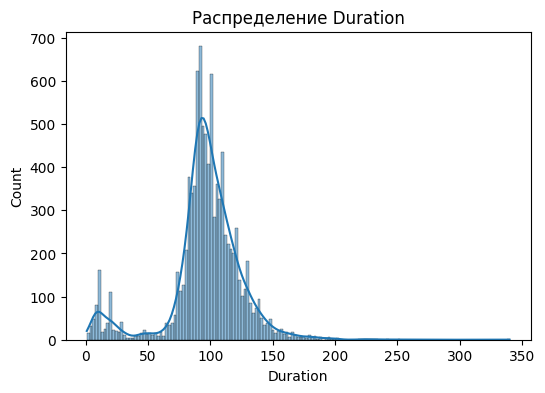

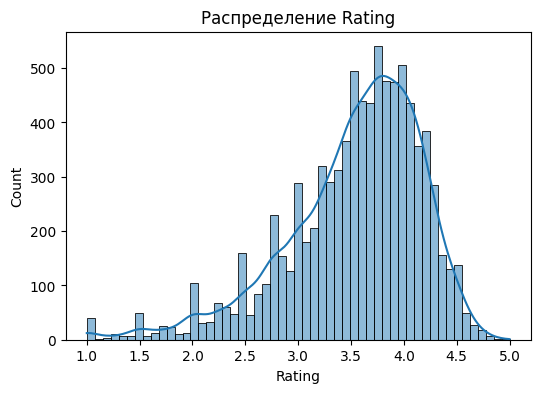

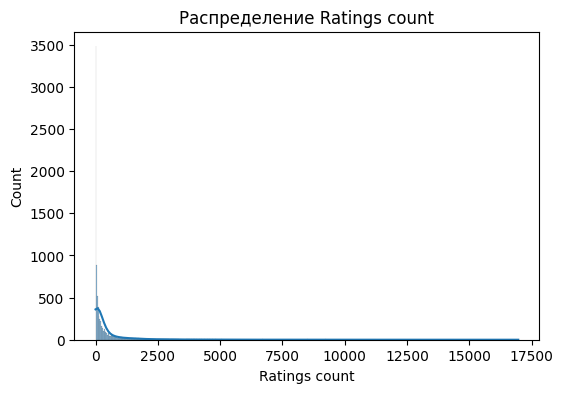

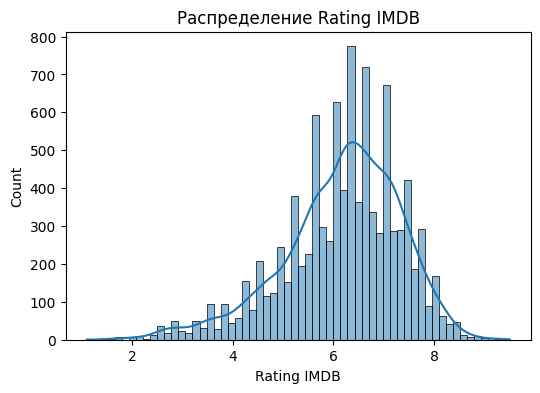

In [32]:
numerical_cols = ['Duration', 'Rating', 'Ratings count', 'Rating IMDB']

# Convert columns to numeric, replacing non-numeric with NaN
for col in numerical_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(final_df[col].dropna(), kde=True)  # Drop NaNs when plotting
    plt.title(f'Распределение {col}')
    plt.show()


In [55]:
all_categories = set([category for sublist in final_df['Category_list'] for category in sublist])
all_prod = set([prod for sublist in final_df['Producer_list'] for prod in sublist])
print(all_categories)
print(all_prod)

{'', 'Драма', 'Кино/Театр', 'Криминал', 'Семейный', 'Романтика', 'Ужасы', 'Фантастика', 'Боевик', 'Детектив', 'Документальный', 'Триллер', 'Вестерн', 'Музыкальный', 'Приключения', 'Военный', 'Фэнтези', 'Мультфильмы', 'Комедия', 'Исторический'}
{'Verso Entertainment', 'HiT Entertainment', 'House of Un-American Activities', 'Lime Orchard Productions', 'Scala Productions', 'Be Gentlemen Limited Partnership', 'LDRP', 'Uncorked Productions', 'Lailaps Pictures', 'The Walt Disney Company Korea', 'Illusion Film', 'Out of Africa Entertainment', 'Leaydodee Studio', 'Untitled Entertainment', 'uMedia', 'Sutor Kolonko', "Fonds d'Action de la Sacem", 'IFC Productions', 'Super Crispy Entertainment', 'Imagine Entertainment', 'Jason Productions', 'Deyi Production', 'Pôle Image Magelis', 'Halon Entertainment', 'Binary Light', 'Larger Than Life Productions', 'Nook Lane Entertainment', 'Media Development Authority (MDA)', 'Silver Screen Partners', 'ApolloMedia', 'Fünfte Babelsberg Film', 'Jorkwang Films',

In [56]:
from collections import Counter
# Считаем все категории
category_counts = Counter([category for sublist in final_df['Category_list'] for category in sublist])
print(category_counts.most_common(10))

prod_counts = Counter([prod for sublist in final_df['Producer_list'] for prod in sublist])
print(prod_counts.most_common(10))

[('Драма', 3893), ('Комедия', 3000), ('Триллер', 2063), ('Боевик', 2042), ('Приключения', 1631), ('Мультфильмы', 1512), ('Романтика', 1445), ('Семейный', 1398), ('Ужасы', 1173), ('Фэнтези', 1136)]
[('Не указаны', 594), ('Soyuzmultfilm', 377), ('Universal Pictures', 305), ('Warner Bros. Pictures', 301), ('Columbia Pictures', 252), ('20th Century Fox', 228), ('Walt Disney Pictures', 219), ('Gorky Film Studios', 198), ('Paramount Pictures', 193), ('Lionsgate', 171)]


Вывод саммых частых стеммингов

In [37]:
def preprocess_text(text: str) -> str:
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(cleaned_text)
    stop_words = set(stopwords.words("russian"))
    tokens_without_stopwords = [token for token in tokens if token.lower() not in stop_words]
    stemmer = SnowballStemmer(language="russian")
    stemmed_tokens = [stemmer.stem(token) for token in tokens_without_stopwords]
    return ' '.join(stemmed_tokens)

final_df['Clean_Description'] = final_df['Description'].apply(preprocess_text)
final_df['Clean_Reviews'] = final_df['Reviews'].apply(preprocess_text)

all_words_description = " ".join(final_df['Clean_Description'])
all_words_reviews = " ".join(final_df['Clean_Reviews'])
desc_word_counts = Counter(all_words_description.split())
review_word_counts = Counter(all_words_reviews.split())

print("Топ-10 частотных слов в описаниях:", desc_word_counts.most_common(10))
print("Топ-10 частотных слов в отзывах:", review_word_counts.most_common(10))

Топ-10 частотных слов в описаниях: [('котор', 4535), ('сво', 3774), ('жизн', 2532), ('сам', 1762), ('эт', 1736), ('друг', 1659), ('мир', 1371), ('нов', 1294), ('одн', 1192), ('год', 1173)]
Топ-10 частотных слов в отзывах: [('фильм', 6420), ('отзыв', 5379), ('эт', 2503), ('очен', 1971), ('котор', 1150), ('част', 1022), ('прост', 1004), ('сам', 941), ('хорош', 939), ('так', 917)]


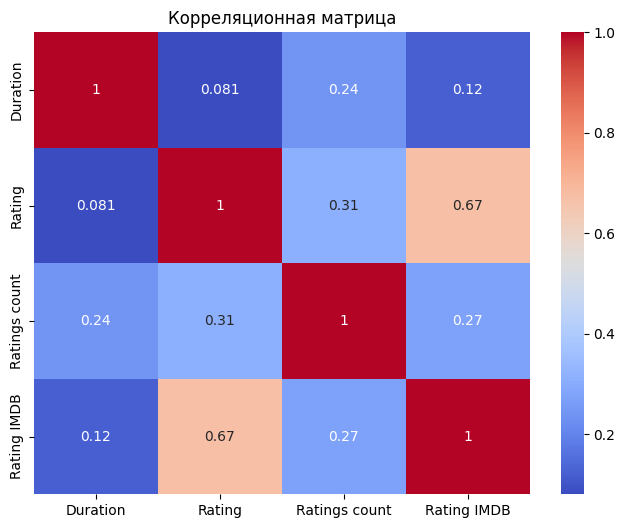

In [38]:
# Корреляция
correlation_matrix = final_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()
